Question 1:  Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("BIKE_DETAILS.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("First 10 rows:\n", df.head(10))

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']
First 10 rows:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_s

Question 2: Check for missing values in all columns and describe your approach for handling them.

In [12]:
print("\nMissing values:\n", df.isnull().sum())
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)
df


Missing values:
 name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,72752.5
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

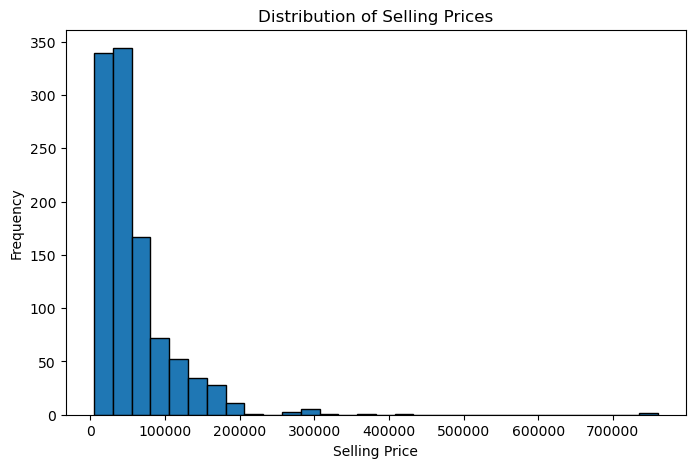

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

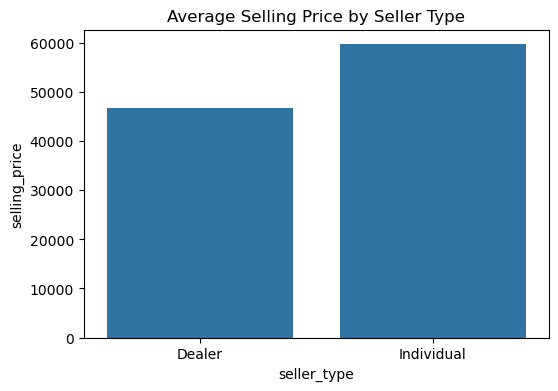

In [11]:
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=avg_price, x='seller_type', y='selling_price')
plt.title("Average Selling Price by Seller Type")
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

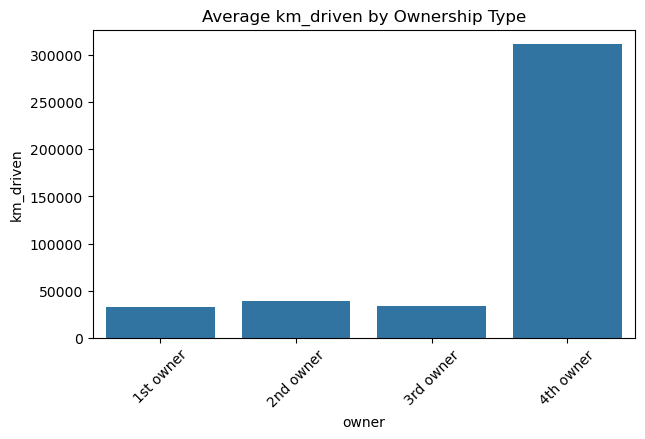

In [13]:
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=avg_km, x='owner', y='km_driven')
plt.title("Average km_driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [14]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("\nBefore removing outliers:\n", df['km_driven'].describe())

# Remove outliers
df = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]

print("\nAfter removing outliers:\n", df['km_driven'].describe())


Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

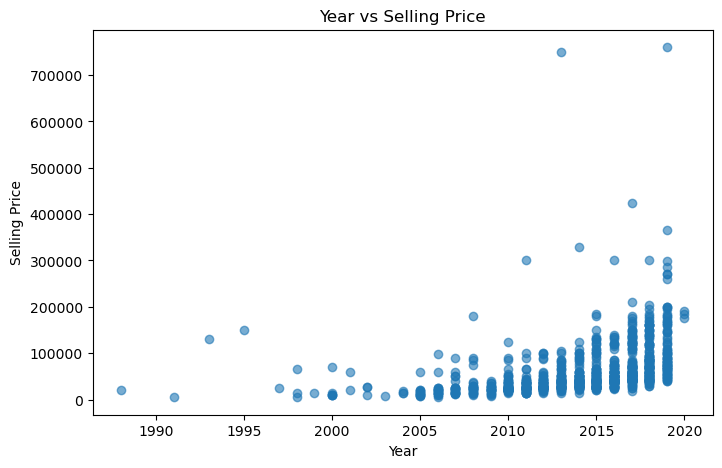

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [19]:


# One-hot encoding the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows of the resulting DataFrame
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350            72752.5                    True  
1       5650            72752.5                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            72752.5                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

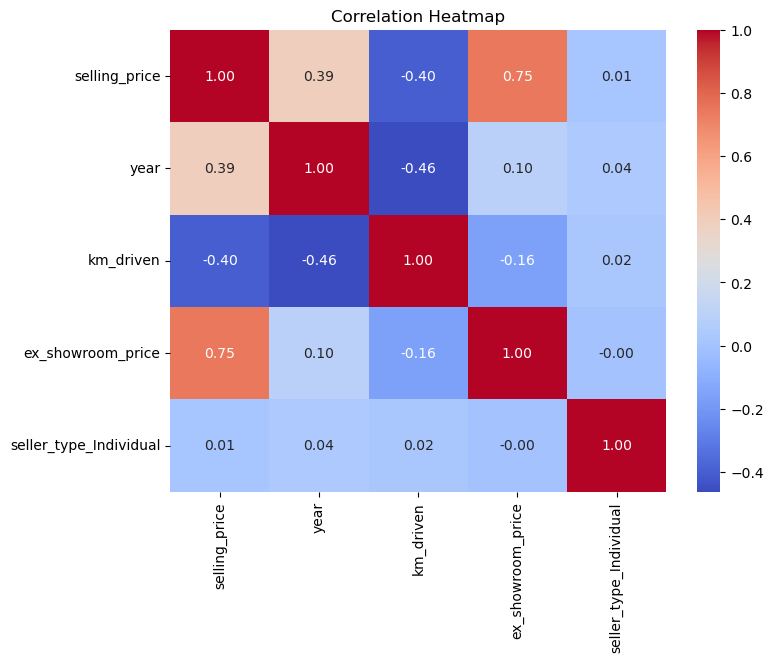

In [21]:
plt.figure(figsize=(8,6))
# Calculate correlation only for numeric columns
corr = df_encoded.corr(numeric_only=True) # <--- Added numeric_only=True here
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Question 10: Summarize your findings in a brief report: 
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


1. Key Factors Affecting Bike Selling Price:

Year (Age of Bike): Newer bikes sell for higher prices, while older bikes lose value quickly.

Ex-Showroom Price: Strong positive correlation with selling price → bikes with higher original price retain higher resale value.

Seller Type: Dealers generally list bikes at higher prices than individual sellers.

Ownership (Owner Count): First-owner bikes sell for higher prices compared to second or third-owner bikes.

Kilometers Driven: Higher km driven usually reduces selling price, though correlation is weaker compared to year and showroom price.

2. Data Cleaning & Feature Engineering Performed:

Handled Missing Values: Filled missing values in ex_showroom_price (~41%) using median imputation.

Outlier Removal: Removed extreme outliers from km_driven using the IQR method, leading to cleaner statistics.

Encoding Categorical Variables: Converted seller_type into numeric format using one-hot encoding for further analysis/modeling.

General Cleaning: Ensured dataset consistency (checked nulls, corrected skew in price distribution through visualization).